In [2]:
import pandas as pd
import sys
import numpy as np
%matplotlib inline
import pylab
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# Const Variables
kt = 0.119;  # Nm/A
kv = 80;     # rpm/V 80rpm = 8.3775804rad/sec

In [4]:
#Change file dir, file name

# No Spool Data
no_spool = pd.read_csv('Data/no_spool/PWM_0.1_Trial_1.csv')
# No Load Data
no_load = pd.read_csv('Data/no_load/PWM_0.1_Trial_2.csv')
# Load Data
l_data_1 = pd.read_csv('Data/load/PWM_0.1_L1_Trial_1.csv')
l_data_2 = pd.read_csv('Data/load/PWM_0.1_L4_Trial_1.csv')
l_data_3 = pd.read_csv('Data/load/PWM_0.1_L6_Trial_1.csv')

In [5]:
def st_t_onumber(x):
    import numbers
    # if any number
    if isinstance(x,numbers.Number):
        return x
    # if non a number try convert string to float or it
    for type_ in (int, float):
        try:
            return type_(x)
        except ValueError:
            continue

In [6]:
no_spool_data = [];
for i in range(len(no_spool)):
    A = no_spool['Angular Position,Angular Velocity'][i].split(',')
    A = [st_t_onumber(x) for x in A]
    no_spool_data.append(A)

In [7]:
no_load_data = [];
for i in range(len(no_load)):
    A = no_load['Angular Position,Angular Velocity'][i].split(',')
    A = [st_t_onumber(x) for x in A]
    no_load_data.append(A)

KeyError: 'Angular Position,Angular Velocity'

In [ ]:
load_data_1 = [];
for i in range(len(l_data_1)):
    A = l_data_1['Angular Position,Angular Velocity'][i].split(',')
    A = [st_t_onumber(x) for x in A]
    load_data_1.append(A)

In [8]:
load_data_2 = [];
for i in range(len(l_data_2)):
    A = l_data_2['Angular Position,Angular Velocity'][i].split(',')
    A = [st_t_onumber(x) for x in A]
    load_data_2.append(A)

In [9]:
load_data_3 = [];
for i in range(len(l_data_3)):
    A = l_data_3['Angular Position,Angular Velocity'][i].split(',')
    A = [st_t_onumber(x) for x in A]
    load_data_3.append(A)

In [10]:
no_spool_t = [];      # time
no_spool_x1 = [];     # angular discplacement
no_spool_x2 = [];     # angular velocity

for i in range(len(no_spool)):
    no_spool_t.append(no_spool_data[i][0])
    no_spool_x1.append(no_spool_data[i][1])
    no_spool_x2.append(no_spool_data[i][2])

In [11]:
no_load_t = [];      # time
no_load_x1 = [];     # angular discplacement
no_load_x2 = [];     # angular velocity

for i in range(len(no_load)):
    no_load_t.append(no_load_data[i][0])
    no_load_x1.append(no_load_data[i][1])
    no_load_x2.append(no_load_data[i][2])

IndexError: list index out of range

In [12]:
load_1_t = [];      # time
load_1_x1 = [];     # angular discplacement
load_1_x2 = [];     # angular velocity

for i in range(len(l_data_1)):
    load_1_t.append(load_data_1[i][0])
    load_1_x1.append(load_data_1[i][1])
    load_1_x2.append(load_data_1[i][2])

NameError: name 'load_data_1' is not defined

In [13]:
load_2_t = [];      # time
load_2_x1 = [];     # angular discplacement
load_2_x2 = [];     # angular velocity

for i in range(len(l_data_2)):
    load_2_t.append(load_data_2[i][0])
    load_2_x1.append(load_data_2[i][1])
    load_2_x2.append(load_data_2[i][2])

In [14]:
load_3_t = [];      # time
load_3_x1 = [];     # angular discplacement
load_3_x2 = [];     # angular velocity

for i in range(len(l_data_3)):
    load_3_t.append(load_data_3[i][0])
    load_3_x1.append(load_data_3[i][1])
    load_3_x2.append(load_data_3[i][2])

In [15]:
diff_vel=np.diff(no_load_x1)*1000

In [892]:
t_diff = no_load_t[0:len(no_load_t)-1]
diff_vel[diff_vel<-5000] = diff_vel[diff_vel<-5000]+2*np.pi*1000

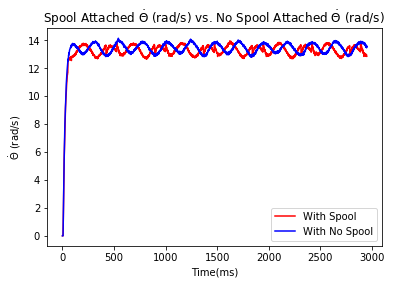

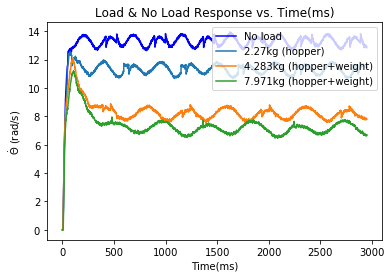

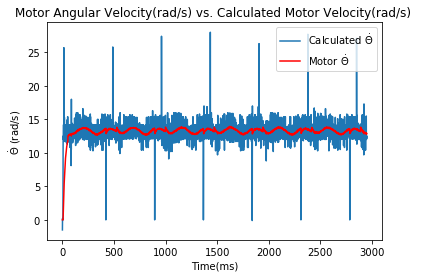

In [894]:
# Motor Angular Velocity vs. Calculated Motor Velocity
pylab.plot(no_load_t,no_load_x2,'r',label=r'With Spool');
pylab.plot(no_spool_t,no_spool_x2,'b',label=r'With No Spool');
pylab.legend(loc='best')
plt.xlabel('Time(ms)')
plt.ylabel(r'$\dot{\Theta}$ (rad/s)')
plt.title('Spool Attached $\dot{\Theta}$ (rad/s) vs. No Spool Attached $\dot{\Theta}$ (rad/s) ')
plt.show();

# No Load vs. Loads
pylab.plot(no_load_t,no_load_x2,'b',label=r'No load');
pylab.plot(load_1_t,load_1_x2,label=r'2.27kg (hopper)');
pylab.plot(load_2_t,load_2_x2,label=r'4.283kg (hopper+weight)');
pylab.plot(load_3_t,load_3_x2,label=r'7.971kg (hopper+weight)');
pylab.legend(loc='upper right')
plt.xlabel('Time(ms)')
plt.ylabel(r'$\dot{\Theta}$ (rad/s)')
plt.title('Load & No Load Response vs. Time(ms)')
plt.show();

# Motor Angular Velocity vs. Calculated Motor Velocity
pylab.plot(t_diff,diff_vel,label=r'Calculated $\dot{\Theta}$');
pylab.plot(no_load_t,no_load_x2,'r',label=r'Motor $\dot{\Theta}$');
pylab.legend(loc='best')
plt.xlabel('Time(ms)')
plt.ylabel(r'$\dot{\Theta}$ (rad/s)')
plt.title('Motor Angular Velocity(rad/s) vs. Calculated Motor Velocity(rad/s) ')
plt.show();